In [ ]:
using Pkg

Pkg.add("DataFrames")
Pkg.add("CSV")
Pkg.add("Plots")
Pkg.add("Lathe")
Pkg.add("GLM")
Pkg.add("StatsPlots")
Pkg.add("MLBase")

using DataFrames
using CSV
using Plots
using Lathe
using GLM
using Statistics
using StatsPlots
using MLBase

ENV["COLUMNS"] = 1000




In [26]:
df = DataFrame(CSV.File("./Life_Expectancy_Data.csv"))
first(df,10)

,Country,Continent,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income_composition_of_resources,Schooling
,String31,String15,Int64,String15,Float64,Int64,Int64,Float64,Float64,String3,Int64,Float64,Int64,String3,String7,String7,Float64,Float64,String15,Float64,Float64,String7,String7
1,Afghanistan,Asia,2015,Developing,65.0,263,62,0.01,71.2796,65,1154,19.1,83,6,8.16,65,0.1,584.259,33736494,17.2,17.3,0.479,10.1
2,Afghanistan,Asia,2014,Developing,59.9,271,64,0.01,73.5236,62,492,18.6,86,58,8.18,62,0.1,612.697,327582,17.5,17.5,0.476,10
3,Afghanistan,Asia,2013,Developing,59.9,268,66,0.01,73.2192,64,430,18.1,89,62,8.13,64,0.1,631.745,31731688,17.7,17.7,0.47,9.9
4,Afghanistan,Asia,2012,Developing,59.5,272,69,0.01,78.1842,67,2787,17.6,93,67,8.52,67,0.1,669.959,3696958,17.9,18.0,0.463,9.8
5,Afghanistan,Asia,2011,Developing,59.2,275,71,0.01,7.09711,68,3013,17.2,97,68,7.87,68,0.1,63.5372,2978599,18.2,18.2,0.454,9.5
6,Afghanistan,Asia,2010,Developing,58.8,279,74,0.01,79.6794,66,1989,16.7,102,66,9.2,66,0.1,553.329,2883167,18.4,18.4,0.448,9.2
7,Afghanistan,Asia,2009,Developing,58.6,281,77,0.01,56.7622,63,2861,16.2,106,63,9.42,63,0.1,445.893,284331,18.6,18.7,0.434,8.9
8,Afghanistan,Asia,2008,Developing,58.1,287,80,0.03,25.8739,64,1599,15.7,110,64,8.33,64,0.1,373.361,2729431,18.8,18.9,0.433,8.7
9,Afghanistan,Asia,2007,Developing,57.5,295,82,0.02,10.9102,63,1141,15.2,113,63,6.73,63,0.1,369.836,26616792,19.0,19.1,0.415,8.4


In [27]:
println(size(df))

(2461, 23)


In [28]:
describe(df)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,Country,,Afghanistan,,Zimbabwe,0,String31
2,Continent,,Africa,,South America,0,String15
3,Year,2007.49,2000,2007.0,2015,0,Int64
4,Status,,Developed,,Developing,0,String15
5,Life_expectancy,69.4646,36.3,72.3,89.0,0,Float64
6,Adult_Mortality,160.962,1,137.0,723,0,Int64
7,infant_deaths,31.1345,0,2.0,1800,0,Int64
8,Alcohol,4.32895,0.0,3.48,17.87,0,Float64
9,percentage_expenditure,880.116,0.0,122.937,19479.9,0,Float64


In [29]:
names(df)

23-element Vector{String}:
 "Country"
 "Continent"
 "Year"
 "Status"
 "Life_expectancy "
 "Adult_Mortality"
 "infant_deaths"
 "Alcohol"
 "percentage_expenditure"
 "Hepatitis_B"
 "Measles "
 " BMI "
 "under_five_deaths "
 "Polio"
 "Total_expenditure"
 "Diphtheria "
 " HIV/AIDS"
 "GDP"
 "Population"
 " thinness  1-19 years"
 " thinness 5-9 years"
 "Income_composition_of_resources"
 "Schooling"

In [30]:
colnames=String63[]
for i in names(df)
    push!(colnames,String(replace(replace(replace(strip(i)," "=>"_"),"-"=>"_"),"/"=>"_")))
end
rename!(df,colnames)

,Country,Continent,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness__1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling
,String31,String15,Int64,String15,Float64,Int64,Int64,Float64,Float64,String3,Int64,Float64,Int64,String3,String7,String7,Float64,Float64,String15,Float64,Float64,String7,String7
1,Afghanistan,Asia,2015,Developing,65.0,263,62,0.01,71.2796,65,1154,19.1,83,6,8.16,65,0.1,584.259,33736494,17.2,17.3,0.479,10.1
2,Afghanistan,Asia,2014,Developing,59.9,271,64,0.01,73.5236,62,492,18.6,86,58,8.18,62,0.1,612.697,327582,17.5,17.5,0.476,10
3,Afghanistan,Asia,2013,Developing,59.9,268,66,0.01,73.2192,64,430,18.1,89,62,8.13,64,0.1,631.745,31731688,17.7,17.7,0.47,9.9
4,Afghanistan,Asia,2012,Developing,59.5,272,69,0.01,78.1842,67,2787,17.6,93,67,8.52,67,0.1,669.959,3696958,17.9,18.0,0.463,9.8
5,Afghanistan,Asia,2011,Developing,59.2,275,71,0.01,7.09711,68,3013,17.2,97,68,7.87,68,0.1,63.5372,2978599,18.2,18.2,0.454,9.5
6,Afghanistan,Asia,2010,Developing,58.8,279,74,0.01,79.6794,66,1989,16.7,102,66,9.2,66,0.1,553.329,2883167,18.4,18.4,0.448,9.2
7,Afghanistan,Asia,2009,Developing,58.6,281,77,0.01,56.7622,63,2861,16.2,106,63,9.42,63,0.1,445.893,284331,18.6,18.7,0.434,8.9
8,Afghanistan,Asia,2008,Developing,58.1,287,80,0.03,25.8739,64,1599,15.7,110,64,8.33,64,0.1,373.361,2729431,18.8,18.9,0.433,8.7
9,Afghanistan,Asia,2007,Developing,57.5,295,82,0.02,10.9102,63,1141,15.2,113,63,6.73,63,0.1,369.836,26616792,19.0,19.1,0.415,8.4


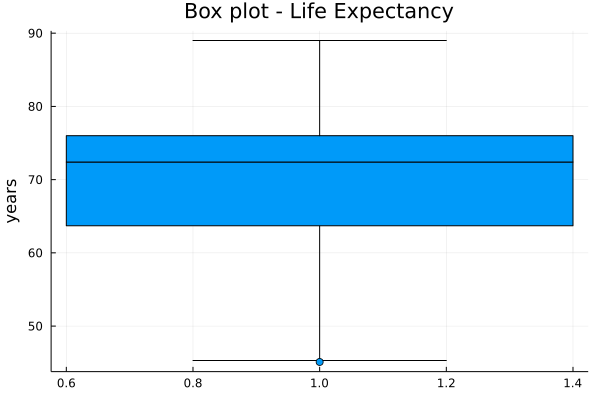

In [42]:
boxplot(df.Life_expectancy, title="Box plot - Life Expectancy",ylabel="years",legend=false)

In [43]:
df=df[(df.Life_expectancy .> 50),:];

In [44]:
println(size(df))

(2346, 23)


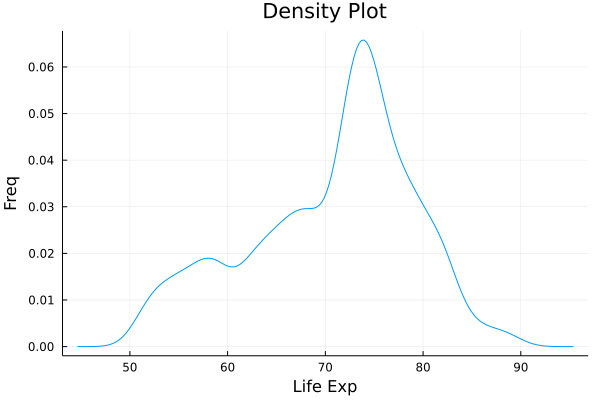

In [45]:
density(df.Life_expectancy, title="Density Plot", ylabel="Freq",xlabel="Life Exp",legend=false)

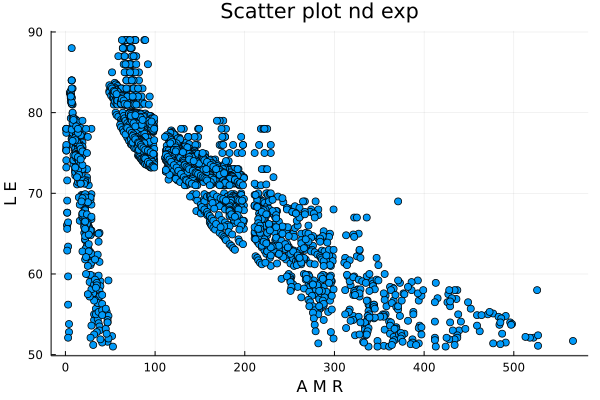

In [46]:
train_plot=scatter(df.Adult_Mortality,df.Life_expectancy,title="Scatter plot nd exp",ylabel="L E",xlabel="A M R",legend=false)

In [47]:
println(cor(df.Adult_Mortality,df.Life_expectancy))

-0.6902154522824018


In [82]:
enc=Lathe.preprocess.OneHotEncoder()
enc_feat=enc.predict(df,:Status)

LoadError: UndefVarError: copy not defined